# Pymaceuticals Inc.
---

### Analysis

- Analyzing the data has led to the following conclusions:
- 1.) Capomulin and Ramicane have had the greatest results in reducing the size of the tumors in the mice over 45 days.
- 2.) Not all of the drug regimens were equally tested. There are inconsistencies in the number of days each regimen was tested.
- 3.) The genders of the mice were evenly distributed allowing for accurate testing across the genders.
- 4.) The weight of the mice needs to be taken into considerationg. The larger the mouse, the larger the tumor. For the most accurate testing you would need to track mice of the same size or record the difference in size of the tumor before and after treatment.
 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata , how="outer", on="Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [109]:
# Checking the number of mice.
sample_size = complete_data["Mouse ID"].nunique()
sample_size

249

In [110]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [111]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = complete_data[complete_data['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data['Mouse ID'] != 'g989']

In [113]:
# Checking the number of mice in the clean DataFrame.
new_size = clean_data["Mouse ID"].nunique()
new_size

248

## Summary Statistics

In [114]:
import numpy as np

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_sizes = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_sizes = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_sizes = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(lambda x: np.var(x, ddof=0))
var_tumor_stdev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(lambda x: np.std(x, ddof=1))
std_err_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))

tumor_size_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_sizes,
    "Median Tumor Volume": median_tumor_sizes,
    "Tumor Volume Variance": var_tumor_sizes,
    "Tumor Volume Std. Dev.": var_tumor_stdev,
    "Tumor Volume Std. Err.": std_err_tumor
})
tumor_size_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
Propriva,52.320930,50.446266,43.555716,6.622085,0.544332
Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111


In [116]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_size_summary_agg = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)
tumor_size_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# Of Observed Mouse Timepoints')

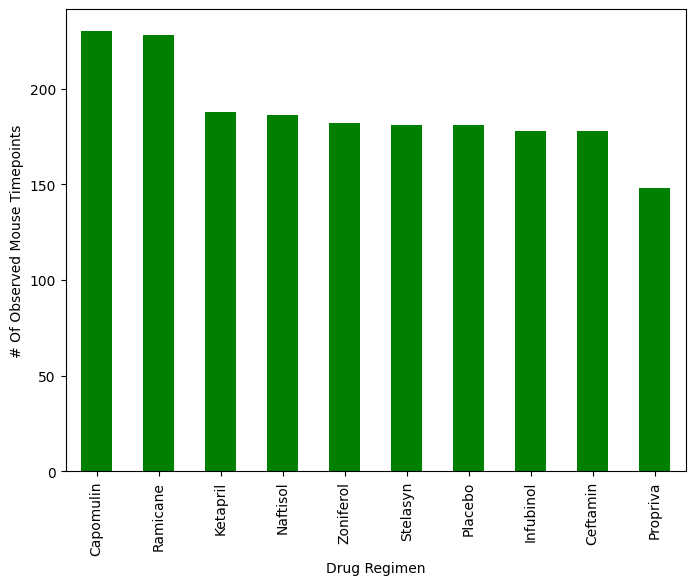

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_data["Drug Regimen"].value_counts()
regimen_count.plot(kind="bar", figsize=(8,6), color="green")
plt.ylabel("# Of Observed Mouse Timepoints")

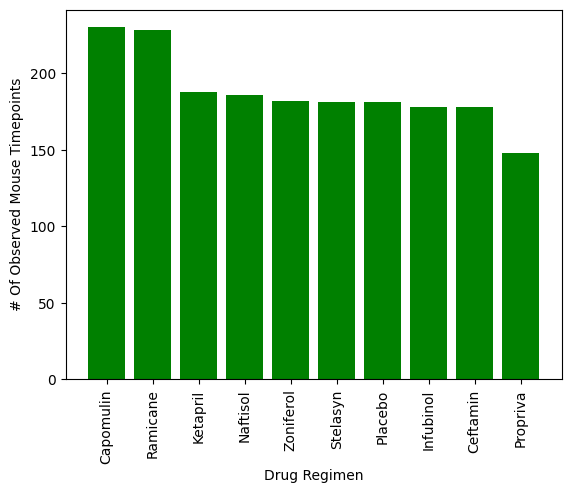

In [118]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_count.index, regimen_count.values, color="green")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

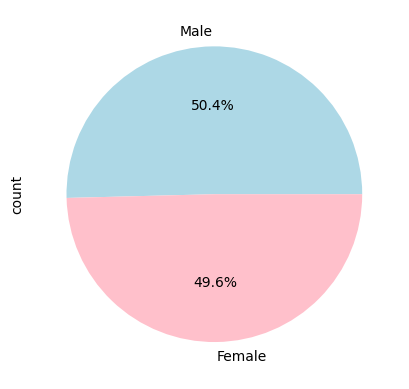

In [119]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_genders = clean_data[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = mice_genders["Sex"].value_counts()
gender_counts

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "pink"])

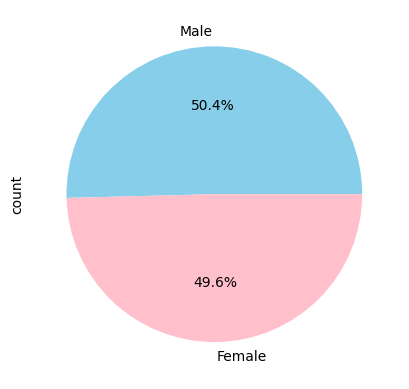

In [120]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_genders = clean_data[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = mice_genders["Sex"].value_counts()
gender_counts

# Make the pie chart
labels = ["Male", "Female"]
sizes = [125, 123]
color = ["skyblue", "pink"]
plt.pie(sizes, labels=labels, colors=color, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(final_tumor_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data = merged_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_data = merged_data[merged_data["Drug Regimen"].isin(selected_treatments)]
final_tumor_data.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = selected_treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_drugs:
    treatment_data = final_tumor_data[final_tumor_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    quart1 = treatment_data.quantile(0.25)
    quart3 = treatment_data.quantile(0.75)
    iqr = quart3 - quart1
    lower_bound = quart1 - 1.5 * iqr
    upper_bound = quart3 + 1.5 * iqr
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{drug}'s Potential Outliers: {outliers}")

Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


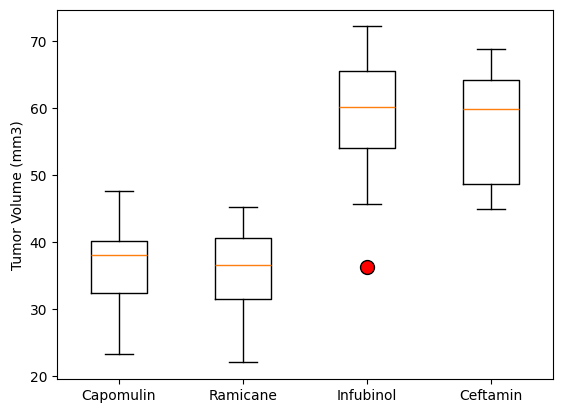

In [123]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_groups = [final_tumor_data[final_tumor_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
                    for drug in selected_treatments]
outlier_specs = dict(marker="o", markerfacecolor="red", markersize=10)
plt.boxplot(treatment_groups, labels=selected_treatments, flierprops=outlier_specs)
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.show()

## Line and Scatter Plots

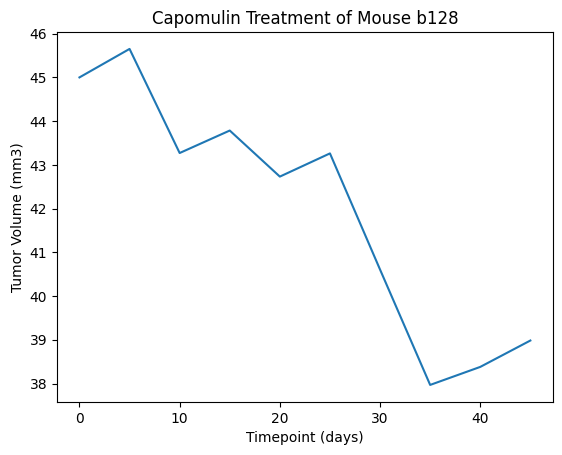

In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_line_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
capo_mouse = capo_line_data["Mouse ID"].iloc[0]
capo_mouse_data = clean_data[clean_data["Mouse ID"] == capo_mouse]
plt.plot(capo_mouse_data["Timepoint"], capo_mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin Treatment of Mouse {capo_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

   Mouse ID  average_tumor_volume  Weight
0      b128             41.963636      22
1      b742             40.083699      21
2      f966             36.505973      17
3      g288             41.990097      19
4      g316             44.613344      22
5      i557             44.805810      24
6      i738             39.141053      20
7      j119             44.465236      23
8      j246             43.216925      21
9      l509             44.434474      21
10     l897             42.507261      19
11     m601             34.847470      17
12     m957             39.049816      19
13     r157             45.798970      25
14     r554             36.509212      17
15     r944             43.367364      25
16     s185             34.559143      17
17     s710             42.803733      23
18     t565             39.328725      17
19     u364             39.887495      17
20     v923             41.581595      21
21     w150             41.384825      23
22     w914             41.352452 

<function matplotlib.pyplot.show(close=None, block=None)>

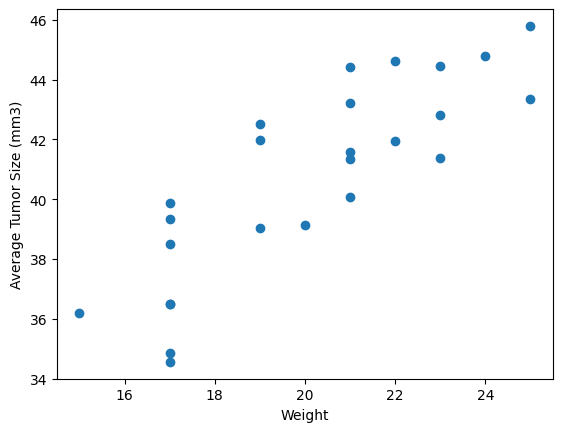

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_scatter_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capo_scatter_data.groupby("Mouse ID").agg(
    average_tumor_volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")
).reset_index()
print(average_tumor_volume)
plt.scatter(average_tumor_volume["Weight"], average_tumor_volume["average_tumor_volume"])
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size (mm3)")
plt.show

## Correlation and Regression

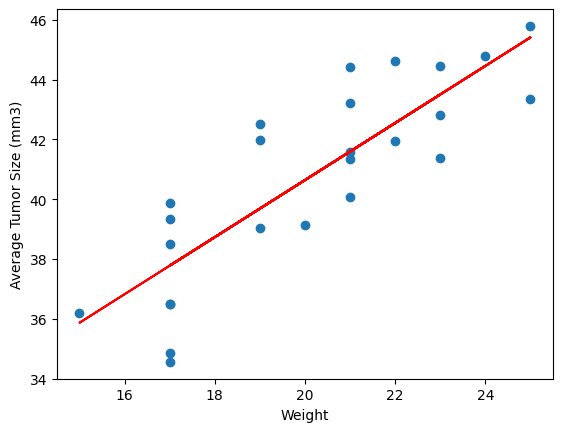

In [107]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st
correlation = st.pearsonr(average_tumor_volume["Weight"], average_tumor_volume["average_tumor_volume"])
slope, intercept, r_value, p_value, std_err = st.linregress(
    average_tumor_volume["Weight"], average_tumor_volume["average_tumor_volume"])
regress_values = average_tumor_volume["Weight"] * slope + intercept
plt.scatter(average_tumor_volume["Weight"], average_tumor_volume["average_tumor_volume"])
plt.plot(average_tumor_volume["Weight"], regress_values, color="red", label="Regression Line")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size (mm3)")
plt.show()